In [1]:
# Import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Définition du chemin d'accès:
### Céline
%cd C:\Users\Céline Doussot\Desktop\GitHub\ParisPyVelib_Datas
### Hermine

### Tarik


C:\Users\Céline Doussot\Desktop\GitHub\ParisPyVelib_Datas


In [15]:
# Import df_hour
df_hour = pd.read_csv('2018-2021_donnees-velib-meteo_hour.csv', index_col = 0)

# Unification des adresses pour supprimer les doublons et création d'une col Adresse_Dir comprenant les coord
    # Passage par excel pour plus de rapidité en utilisant la formule (df = df_hour.groupby(['Id','Address']).mean())
df = pd.read_csv('Adress_by_Id.csv', index_col=0)
df_hour = df_hour.drop(['Address'], axis = 1) # l'ancienne adresse est supprimée
df_hour = df_hour.merge(df, on = 'Id', how = 'left') # la nouvelle adresse est ajoutée
df_hour['Address_Dir'] = df_hour['Address'] + ' ' + df_hour['Direction'] # la col adresse avec direction est créée
df_hour.nunique()

C:\Apps\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Id                        95
Count_by_hour           1053
Date                    1245
Date_instal               37
Source                     4
Direction                  8
Latitude                  35
Longitude                 43
Coord                     50
Y_Date_Count               4
M_Date_Count              12
D_Date_Count              31
Dweek_Date_Count           7
H_Date_Count              24
Y_Date_Instal              6
M_Date_Instal              9
D_Date_Instal             21
T°C                      414
Precip_last3h             89
HR%                       84
High_ice                  15
Wind_speed_mean10mn      124
City_meteo                 1
Datetime               29830
nom_jour_ferie            12
vacances_zone_c            2
nom_vacances               7
Confinement_id             4
Address                   50
Address_Dir               95
dtype: int64

# Evolution Compteurs

In [16]:
# Suppression des col inutiles
df = df_hour.drop(['Date', 'Date_instal', 'Source', 'Direction',
       'Latitude', 'Longitude', 'Coord',
       'Dweek_Date_Count', 'H_Date_Count', 'Y_Date_Instal',
       'M_Date_Instal', 'D_Date_Instal', 'T°C', 'Precip_last3h', 'HR%',
       'High_ice', 'Wind_speed_mean10mn', 'City_meteo', 'Datetime',
       'nom_jour_ferie', 'vacances_zone_c', 'nom_vacances', 'Confinement_id', 'Id'], axis = 1) 

# Création d'un df par année et par compteurs
col = ['Y_Date_Count','Address_Dir']
df_year = df.groupby(col).mean().reset_index()
df_year

,Y_Date_Count,Address_Dir,Count_by_hour,M_Date_Count,D_Date_Count
0,2018,AV DAUMESNIL SE-NO,40.912785,6.511617,15.680325
1,2018,AV DE LA GRANDE ARMEE NO-SE,18.635157,9.894583,16.122677
2,2018,AV DE LA GRANDE ARMEE SE-NO,12.352629,9.894583,16.122677
3,2018,AV DE LA PORTE DES TERNES E-O,8.079531,11.940026,16.361147
4,2018,AV DE LA PORTE DES TERNES O-E,11.069532,11.911504,16.716814
...,...,...,...,...,...
307,2021,RUE SAINT JACQUES N-S,11.984615,2.986573,15.419301
308,2021,RUE TURBIGO NE-SO,71.454266,2.986573,15.419301
309,2021,RUE TURBIGO SO-NE,71.531469,2.986573,15.419301
310,2021,VOIE GEORGES POMPIDOU NE-SO,27.673077,2.984615,14.461538


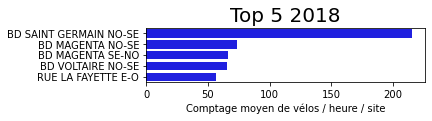

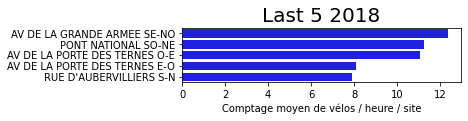

In [17]:
# 2018
df2 = df_year[df_year['Y_Date_Count'] == 2018].sort_values(by = 'Count_by_hour', ascending = False)

# Top
fig = plt.figure(figsize = (5,1))
    #plt.subplot(4,4,1) pourquoi ça marche pas ???
sns.barplot(x = df2['Count_by_hour'].head(5), y = df2['Address_Dir'].head(5), color = 'b');
plt.title('Top 5 2018', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()
# Last
fig = plt.figure(figsize = (5,1))
sns.barplot(x = df2['Count_by_hour'].tail(5), y = df2['Address_Dir'].tail(5), color = 'b');
plt.title('Last 5 2018', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()

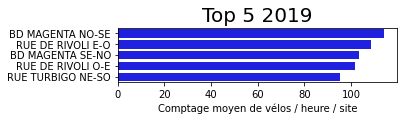

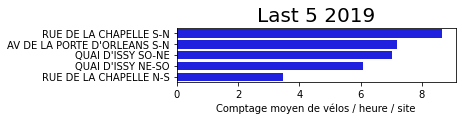

In [18]:
# 2019
df2 = df_year[df_year['Y_Date_Count'] == 2019].sort_values(by = 'Count_by_hour', ascending = False)

# Top
fig = plt.figure(figsize = (5,1))
sns.barplot(x = df2['Count_by_hour'].head(5), y = df2['Address_Dir'].head(5), color = 'b');
plt.title('Top 5 2019', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()
# Last
fig = plt.figure(figsize = (5,1))
sns.barplot(x = df2['Count_by_hour'].tail(5), y = df2['Address_Dir'].tail(5), color = 'b');
plt.title('Last 5 2019', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()

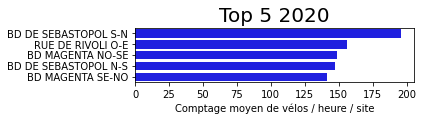

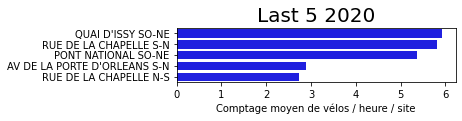

In [19]:
# 2020
df2 = df_year[df_year['Y_Date_Count'] == 2020].sort_values(by = 'Count_by_hour', ascending = False)

# Top
fig = plt.figure(figsize = (5,1))
sns.barplot(x = df2['Count_by_hour'].head(5), y = df2['Address_Dir'].head(5), color = 'b');
plt.title('Top 5 2020', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()
# Last
fig = plt.figure(figsize = (5,1))
sns.barplot(x = df2['Count_by_hour'].tail(5), y = df2['Address_Dir'].tail(5), color = 'b');
plt.title('Last 5 2020', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()

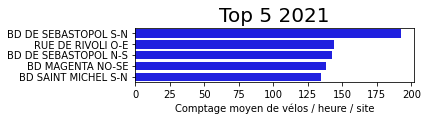

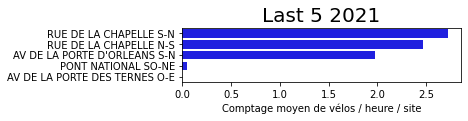

In [20]:
# 2021
df2 = df_year[df_year['Y_Date_Count'] == 2021].sort_values(by = 'Count_by_hour', ascending = False)

# Top
fig = plt.figure(figsize = (5,1))
sns.barplot(x = df2['Count_by_hour'].head(5), y = df2['Address_Dir'].head(5), color = 'b');
plt.title('Top 5 2021', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()
# Last
fig = plt.figure(figsize = (5,1))
sns.barplot(x = df2['Count_by_hour'].tail(5), y = df2['Address_Dir'].tail(5), color = 'b');
plt.title('Last 5 2021', fontsize = 20)
plt.xlabel('Comptage moyen de vélos / heure / site')
plt.ylabel('')
plt.show()

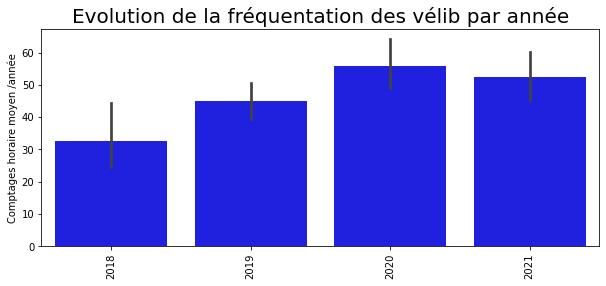

In [21]:
#Affichage de l'évolution des comptages horaire moyen /année
fig = plt.figure(figsize = (10,4))
sns.barplot(x = df_year['Y_Date_Count'], y = df_year['Count_by_hour'], color = 'b');
plt.title('Evolution de la fréquentation des vélib par année', fontsize = 20)
plt.ylabel('Comptages horaire moyen /année')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()

- Malgrès les confinements en 2020, la fréquentation des vélib ne cesse d'augmenter
- 2021 n'est pas une année complète (janvier-mai) ce qui peut expliquer la baisse de fréquentation n'étant pas comparable aux autres années.

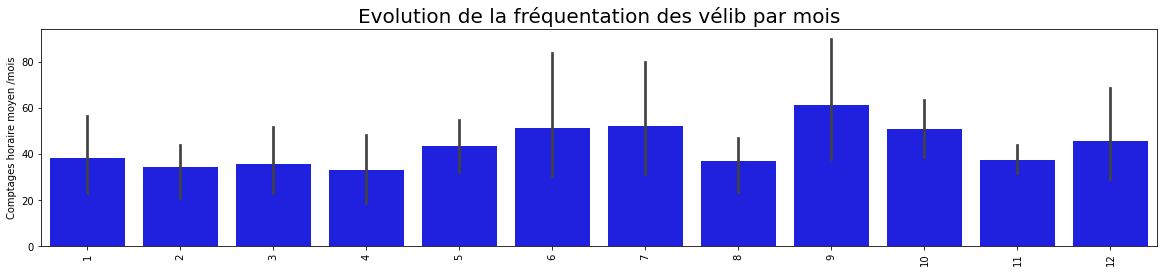

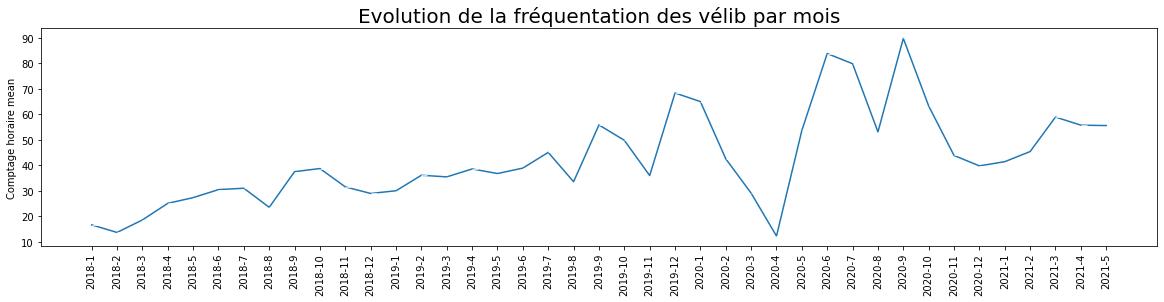

In [33]:
#Affichage de l'évolution des comptages horaires moyen / mois

# Création d'un df par mois et par compteurs
col = ['Y_Date_Count','M_Date_Count']
df_month = df.groupby(col).mean().reset_index()
df_month['Y_M_Date_Count'] = df_month['Y_Date_Count'].astype(str) + '-' + df_month['M_Date_Count'].astype(str)
df_month

# Affichage barplot
fig = plt.figure(figsize = (20,4))
sns.barplot(x = df_month['M_Date_Count'], y = df_month['Count_by_hour'], color = 'b');
plt.title('Evolution de la fréquentation des vélib par mois', fontsize = 20)
plt.ylabel('Comptages horaire moyen /mois')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()

# Affichage linéaire
fig = plt.figure(figsize = (20,4))
sns.lineplot(x = df_month['Y_M_Date_Count'], y = df_month['Count_by_hour'], ci=None, marker = True);
plt.title('Evolution de la fréquentation des vélib par mois', fontsize = 20)
plt.ylabel('Comptage horaire mean')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()

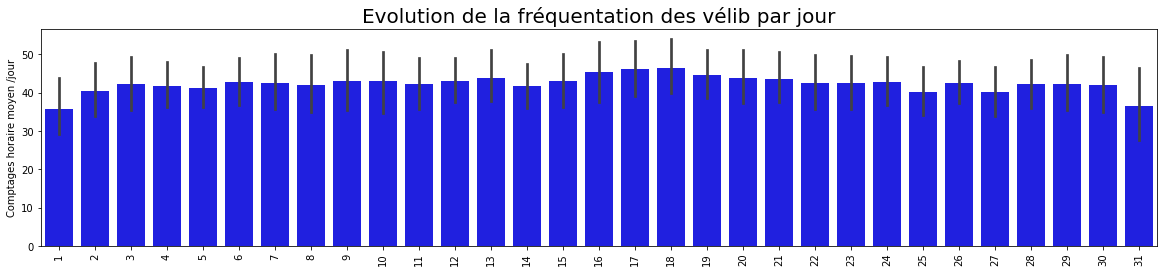

In [37]:
#Affichage de l'évolution des comptages horaires moyen / jour

# Création d'un df par mois et par compteurs
col = ['Y_Date_Count','M_Date_Count','D_Date_Count']
df_day = df.groupby(col).mean().reset_index()

# Affichage barplot jour 1 à 31
fig = plt.figure(figsize = (20,4))
sns.barplot(x = df_day['D_Date_Count'], y = df_day['Count_by_hour'], color = 'b');
plt.title('Evolution de la fréquentation des vélib par jour', fontsize = 20)
plt.ylabel('Comptages horaire moyen /jour')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()

- Baisse de fréquentation observé le 31 et 1 du mois ce qui est surprenant --> une idée pour expliquer le phénomène ?

In [38]:
df_hour.head()

,Id,Count_by_hour,Date,Date_instal,Source,Direction,Latitude,Longitude,Coord,Y_Date_Count,...,High_ice,Wind_speed_mean10mn,City_meteo,Datetime,nom_jour_ferie,vacances_zone_c,nom_vacances,Confinement_id,Address,Address_Dir
0,1.1,1.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,48.848,2.276,"48.84800,2.27600",2018,...,NaN,NaN,NaN,2018-01-01 00:00:00,1er janvier,True,Vacances de Noël,None,VOIE GEORGES POMPIDOU,VOIE GEORGES POMPIDOU NE-SO
1,1.1,3.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,48.848,2.276,"48.84800,2.27600",2018,...,0.0,7.0,Athis-Mons,2018-01-01 01:00:00,1er janvier,True,Vacances de Noël,None,VOIE GEORGES POMPIDOU,VOIE GEORGES POMPIDOU NE-SO
2,1.1,1.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,48.848,2.276,"48.84800,2.27600",2018,...,NaN,NaN,NaN,2018-01-01 02:00:00,1er janvier,True,Vacances de Noël,None,VOIE GEORGES POMPIDOU,VOIE GEORGES POMPIDOU NE-SO
3,1.1,2.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,48.848,2.276,"48.84800,2.27600",2018,...,NaN,NaN,NaN,2018-01-01 03:00:00,1er janvier,True,Vacances de Noël,None,VOIE GEORGES POMPIDOU,VOIE GEORGES POMPIDOU NE-SO
4,1.1,0.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,48.848,2.276,"48.84800,2.27600",2018,...,0.0,6.8,Athis-Mons,2018-01-01 04:00:00,1er janvier,True,Vacances de Noël,None,VOIE GEORGES POMPIDOU,VOIE GEORGES POMPIDOU NE-SO
